# Brazilian regular gas prices between 2019 to 07 2022

This Jupyter Notebook has the objective to observe gas prices during pandemic and after state tax reduction called 'ICMS'. Database used is downloaded from government website, IBGE. There are two detail level, state level with an animated plot and national leve with a line plot aggregated by average state price. They are 12 files which summing it takes almost 500 MB.

This documment is divided in these sections:
- Get Brazil geoJSOn files to plot correctly brazil's states.
- Importing files from database (download them manually)
- Filtering target fuel and grouping by state
- Checking encoding and data handling
- Grouping by year and month
- Plotting in a map
- Plotting national average price

Downloads links ; main link: https://dados.gov.br/dataset/serie-historica-de-precos-de-combustiveis-por-revenda

Files links:

http://landpage-h.cgu.gov.br/dadosabertos/index.php?url=https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsas/ca/ca-2019-01.csv

http://landpage-h.cgu.gov.br/dadosabertos/index.php?url=https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsas/ca/ca-2019-02.csv

http://landpage-h.cgu.gov.br/dadosabertos/index.php?url=https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsas/ca/ca-2020-01.csv

http://landpage-h.cgu.gov.br/dadosabertos/index.php?url=https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsas/ca/ca-2020-02.csv

http://landpage-h.cgu.gov.br/dadosabertos/index.php?url=https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsas/ca/ca-2021-01.csv

http://landpage-h.cgu.gov.br/dadosabertos/index.php?url=https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsas/ca/ca-2021-02.csv

http://landpage-h.cgu.gov.br/dadosabertos/index.php?url=https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2022/precos-gasolina-etanol-2022-01.csv

http://landpage-h.cgu.gov.br/dadosabertos/index.php?url=https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2022/precos-gasolina-etanol-2022-02.csv

http://landpage-h.cgu.gov.br/dadosabertos/index.php?url=https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2022/dados-abertos-precos-2022-03-gasolina-etanol.csv

http://landpage-h.cgu.gov.br/dadosabertos/index.php?url=https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2022/precos-gasolina-etanol-04.csv

http://landpage-h.cgu.gov.br/dadosabertos/index.php?url=https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2022/precos-gasolina-etanol-05.csv

http://landpage-h.cgu.gov.br/dadosabertos/index.php?url=https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2022/precos-gasolina-etanol-06.csv

http://landpage-h.cgu.gov.br/dadosabertos/index.php?url=https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/qus/ultimas-4-semanas-gasolina-etanol-2.csv


Note: The July 2022 file is the last four weeks gas/ethanol price. This files may change to when you are trying to replicate this files, since there is not filter for futher 07/2022 dates.

## Importing libraries and database

In [2]:
#Libraries import, install them if needed.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import requests
import plotly.express as px
import os
import glob
import csv

## Brazil geoJSON
First, let's download geometrical json files from github as a python dictionary to use them after.

In [3]:
response = requests.get(url = 'https://raw.githubusercontent.com/fititnt/gis-dataset-brasil/master/uf/geojson/uf.json')
if response.status_code == 200: #200 is ok
    state_geo = response.json()

In [4]:
# getting files names
path = './data/'
extension = 'csv'
os.chdir(path)
result = glob.glob('*.{}'.format(extension))
result

['ca-2019-01.csv',
 'ca-2019-02.csv',
 'ca-2020-01.csv',
 'ca-2020-02.csv',
 'ca-2021-01.csv',
 'ca-2021-02.csv',
 'precos-gasolina-etanol-01.csv',
 'precos-gasolina-etanol-02.csv',
 'precos-gasolina-etanol-03.csv',
 'precos-gasolina-etanol-04.csv',
 'precos-gasolina-etanol-05.csv',
 'precos-gasolina-etanol-06.csv',
 'ultimas-4-semanas-gasolina-etanol-2.csv']

## Importing files from database (download them manually)
Let's check if this database has a non-changing structure which means if they all have the same columns. This process is below minimal, normally we must check unique values in categorical data type before grouping, check missing values... It's not done here to reduce script size.

In [5]:
file_test = result[0:][0]
db = pd.read_csv(file_test,encoding='ANSI',engine='python',delimiter=';',decimal=',',index_col=False,nrows=5 )
db.head()


,ï»¿Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,SE,SP,GUARULHOS,AUTO POSTO SAKAMOTO LTDA,49.051.667/0001-02,RODOVIA PRESIDENTE DUTRA,S/N,"KM 210,5-SENT SP/RJ",BONSUCESSO,07178-580,GASOLINA,03/01/2019,4.199,3.5766,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
1,SE,SP,GUARULHOS,AUTO POSTO SAKAMOTO LTDA,49.051.667/0001-02,RODOVIA PRESIDENTE DUTRA,S/N,"KM 210,5-SENT SP/RJ",BONSUCESSO,07178-580,ETANOL,03/01/2019,2.899,2.3513,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
2,SE,SP,GUARULHOS,AUTO POSTO SAKAMOTO LTDA,49.051.667/0001-02,RODOVIA PRESIDENTE DUTRA,S/N,"KM 210,5-SENT SP/RJ",BONSUCESSO,07178-580,DIESEL S10,03/01/2019,3.349,2.8841,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
3,SE,SP,GUARULHOS,AUTO POSTO SAKAMOTO LTDA,49.051.667/0001-02,RODOVIA PRESIDENTE DUTRA,S/N,"KM 210,5-SENT SP/RJ",BONSUCESSO,07178-580,GNV,03/01/2019,2.439,NaN,R$ / mÂ³,PETROBRAS DISTRIBUIDORA S.A.
4,S,RS,CANOAS,METROPOLITANO COMERCIO DE COMBUSTIVEIS LTDA,88.587.589/0001-17,AVENIDA GUILHERME SCHELL,6340,NaN,CENTRO,92310-000,GASOLINA,02/01/2019,4.399,3.8550,R$ / litro,BRANCA


In [6]:
structureTest = []
for csvs in result:
    csvs = './'+csvs
    with open(csvs,encoding='ANSI', newline='') as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        count=0
        for row in csv_reader:
            if count:
                break;
            count +=1
            structureTest = structureTest + row
            
structureTest = str(structureTest).split(';')
print(sorted(set(structureTest)))

['Bairro', "Bandeira', 'Regiao - Sigla", "Bandeira', 'ï»¿Regiao - Sigla", "Bandeira']", 'CNPJ da Revenda', 'Cep', 'Complemento', 'Data da Coleta', 'Estado - Sigla', 'Municipio', 'Nome da Rua', 'Numero Rua', 'Produto', 'Revenda', 'Unidade de Medida', 'Valor de Compra', 'Valor de Venda', "['ï»¿Regiao - Sigla"]


Except for a special character such as [ and ï»¿ all data tables has the same columns names

## Filtering target fuel and grouping by state
As files files are big, more than 50 MB each. To avoid overloading pandas, we'll work in each table for time and then join them.

In [7]:
precosGasAno = pd.DataFrame()
#dateparserbr = lambda x: pd.datetime.strptime(x, "%d/%m/%Y") Decreptiated format
for csv in result:
    print(csv)
    db = pd.read_csv('./{}'.format(csv),encoding='ANSI',engine='python',delimiter=';',decimal=',',index_col=False)#,parse_dates=['Data da Coleta'] ,date_parser=dateparserbr
    # You can change engine or delete this parameter to increase speed but it will lose accentuation
    db['Data da Coleta'] = pd.to_datetime(db['Data da Coleta'],format='%d/%m/%Y')
    db['Ano e Mes'] = db['Data da Coleta'].dt.strftime('%Y/%m')
    db_produto_filtro = db['Produto'].isin(['GASOLINA'])
    db_gasolina = db[db_produto_filtro]
    db_gasolina_estado = db_gasolina.groupby(['Estado - Sigla','Ano e Mes'], as_index=False)['Valor de Venda'].mean()
    precosGasAno = pd.concat([precosGasAno,db_gasolina_estado],ignore_index=True)

ca-2019-01.csv
ca-2019-02.csv
ca-2020-01.csv
ca-2020-02.csv
ca-2021-01.csv
ca-2021-02.csv
precos-gasolina-etanol-01.csv
precos-gasolina-etanol-02.csv
precos-gasolina-etanol-03.csv
precos-gasolina-etanol-04.csv
precos-gasolina-etanol-05.csv
precos-gasolina-etanol-06.csv
ultimas-4-semanas-gasolina-etanol-2.csv


## Checking encoding and data handling
After merging, let's check our new database.

In [8]:
precosGasAno.sort_values(by=['Ano e Mes','Estado - Sigla'],inplace=True,ignore_index=True)
precosGasAno

,Estado - Sigla,Ano e Mes,Valor de Venda
0,AC,2019/01,4.820292
1,AL,2019/01,4.525934
2,AM,2019/01,4.107835
3,AP,2019/01,3.871110
4,BA,2019/01,4.499906
...,...,...,...
1156,RS,2022/07,6.223170
1157,SC,2022/07,6.098993
1158,SE,2022/07,6.463068
1159,SP,2022/07,5.973317


It does look ok! Values were ordered to be better to understand.

In [60]:
min = precosGasAno['Valor de Venda'].min()
max = precosGasAno['Valor de Venda'].max()
pricesLoc = [min,max]
precosGasAno.loc[precosGasAno['Valor de Venda'].isin(pricesLoc)]

,Estado - Sigla,Ano e Mes,Valor de Venda
435,AP,2020/05,2.994821
1042,PI,2022/04,8.048842


This is an insane variation! Although we are looking at a large country with an independent state tax regulation and high inflation, this can be acceptable.

## Plotting in a map
Animation is commented (with # symbol) because it generates a very heavy file, and only this output is deleted.

This is record gif before notebook translation:

![SegmentLocal](Gasolina.gif "segment")

I recommend restarting the kernel between runs.

In [ ]:
# Plotando mapa com animação dos preços. A animação está desabilitada agora pois gera um arquivo muito pesado, podendo travar o script. 
# Recomendo reiniciar o kernel entre execuções.
fig = px.choropleth(precosGasAno, geojson=state_geo, color="Valor de Venda",
                    locations="Estado - Sigla", featureidkey="properties.UF_05",
                    projection="mercator",
                    labels={'Valor de Venda':' Valor de Venda'},
                    color_continuous_scale='Oranges',
                    animation_frame="Ano e Mes",
                    range_color=(min,max),
                    width=800,
                    height=600,
                   )
fig.update_geos(fitbounds="geojson", visible=False)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

## Plotting national average price
Let's plot a basic line chart and then get it better.

In [58]:
precosGasAnoMed = precosGasAno.groupby(['Ano e Mes'], as_index=False)['Valor de Venda'].mean()
precosGasAnoMed.tail(3)



,Ano e Mes,Valor de Venda
39,2022/05,7.361250
40,2022/06,7.366278
41,2022/07,6.435902


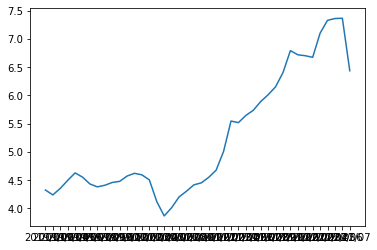

In [59]:
plt.plot(precosGasAnoMed['Ano e Mes'],precosGasAnoMed['Valor de Venda'],linestyle='solid')

In [56]:
#Getting min and max prices' value
min = precosGasAnoMed['Valor de Venda'].min()
max = precosGasAnoMed['Valor de Venda'].max()
print('Min = ',min,' | Max = ',max)

Min =  3.8658559717547014  | Max =  7.366277620129279


In [41]:
#Finding the max and min prices dates
pricesLoc = [min,max]
precosGasAnoMed.loc[precosGasAnoMed['Valor de Venda'].isin(pricesLoc)]

,Ano e Mes,Valor de Venda
16,2020/05,3.865856
40,2022/06,7.366278


In [50]:
# Getting values for special markers
markerDesiredpointsx = ['2020/03','2020/05','2022/06','2022/07'] # begin of pandemic, lowest price, highest price, after ICMS change
markers = precosGasAnoMed.loc[precosGasAnoMed['Ano e Mes'].isin(markerDesiredpointsx)]
markerspointsx = markers['Ano e Mes'].tolist()
markerspointsy= markers['Valor de Venda'].tolist()

### Observed impact
By plotting the national average price, we can observe that:
- The initial impact of the pandemic with the slowdown in the economy and temporary deflation.
- COVID-19 caused a massive increase in price in Brazil, price went to 
- The decrease of R$0.93, around 13.4%, in the average price of gasoline after the ICMS reduction.

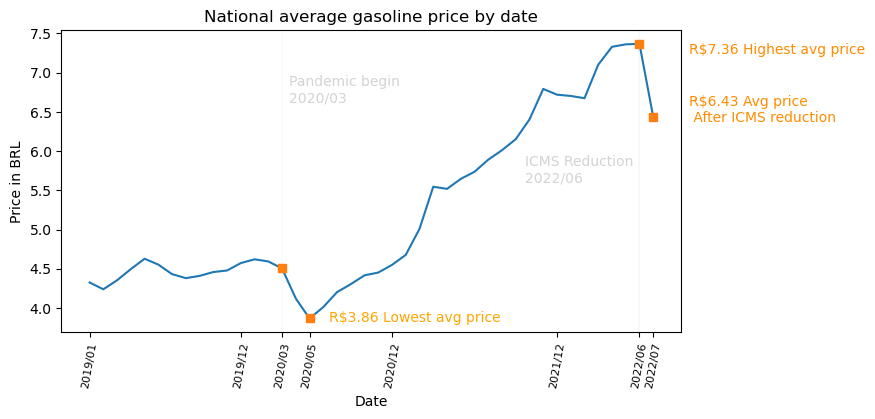

In [53]:
#Plotting
plt.figure(figsize=(8,4),dpi=100)
plt.title('National average gasoline price by date')
plt.xlabel('Date')
plt.ylabel('Price in BRL')

plt.plot(precosGasAnoMed['Ano e Mes'],precosGasAnoMed['Valor de Venda'],linestyle='solid')

important_dates = ['2019/01','2019/12','2020/03','2020/05','2020/12','2021/12','2022/06','2022/07']

plt.xticks(ticks=important_dates,rotation=80,fontsize=8)
plt.plot(markerspointsx, markerspointsy, "s")

plt.axvline('2020/03',lw=0.1,c='lightgrey')
plt.figtext(x=0.41,y=0.7,s='Pandemic begin \n2020/03',c='lightgrey')

plt.axvline('2022/06',lw=0.1,c='darkgrey')
plt.figtext(x=0.705,y=0.5,s='ICMS Reduction\n2022/06',c='lightgrey')

plt.figtext(x=0.46,y=0.15,s='R$3.86 Lowest avg price',c='orange')
plt.figtext(x=0.91,y=0.82,s='R$7.36 Highest avg price',c='darkorange')
plt.figtext(x=0.91,y=0.65,s='R$6.43 Avg price \n After ICMS reduction',c='darkorange')

#plt.text(x=44,y=4.8,s='By only changing IMCS rate, mostly, from 25% to 17%, \nthe prices dropped almost 1 BRL. \nThis an attempt to control inflation and significant price drop.',c='darkorange')

plt.show()